<a href="https://colab.research.google.com/github/jumpingsphinx/ESE2030/blob/main/ESE2030_HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Funnily enough, I think I found the rough prompt that prof-g used to generate one of the example colabs we saw on Wednesday (or maybe Friday, i don't remember exactly which day), and using claude managed to generate basically the same notebook.

Loading LFW dataset...
Dataset loaded: 1288 images
Each image: 125x125 pixels
Number of different people: 7


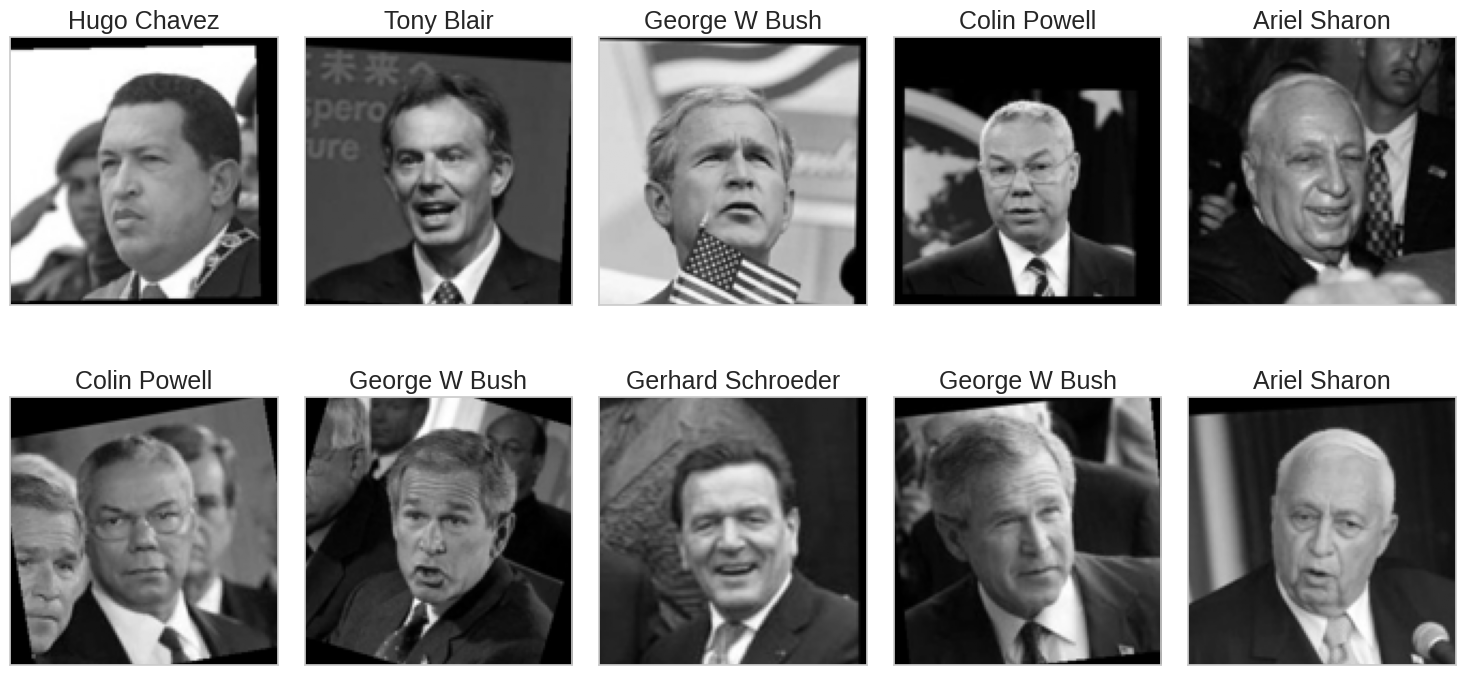

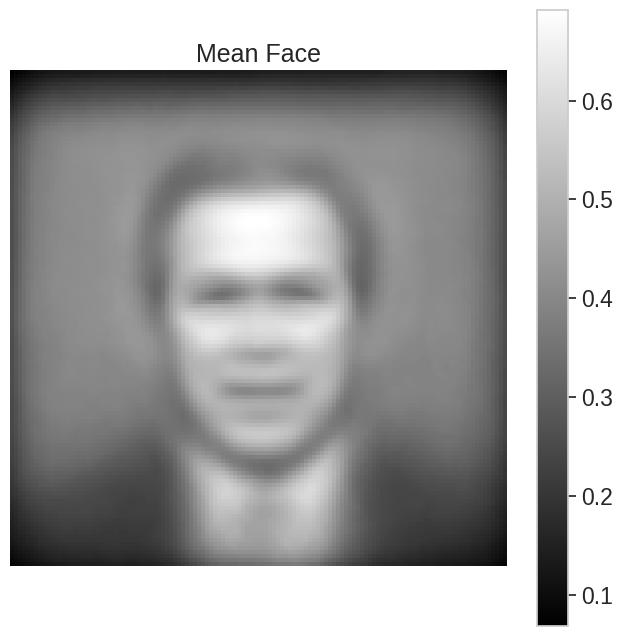

Computing 100 principal components...
PCA computed with 100 components
Explained variance ratio: 0.86


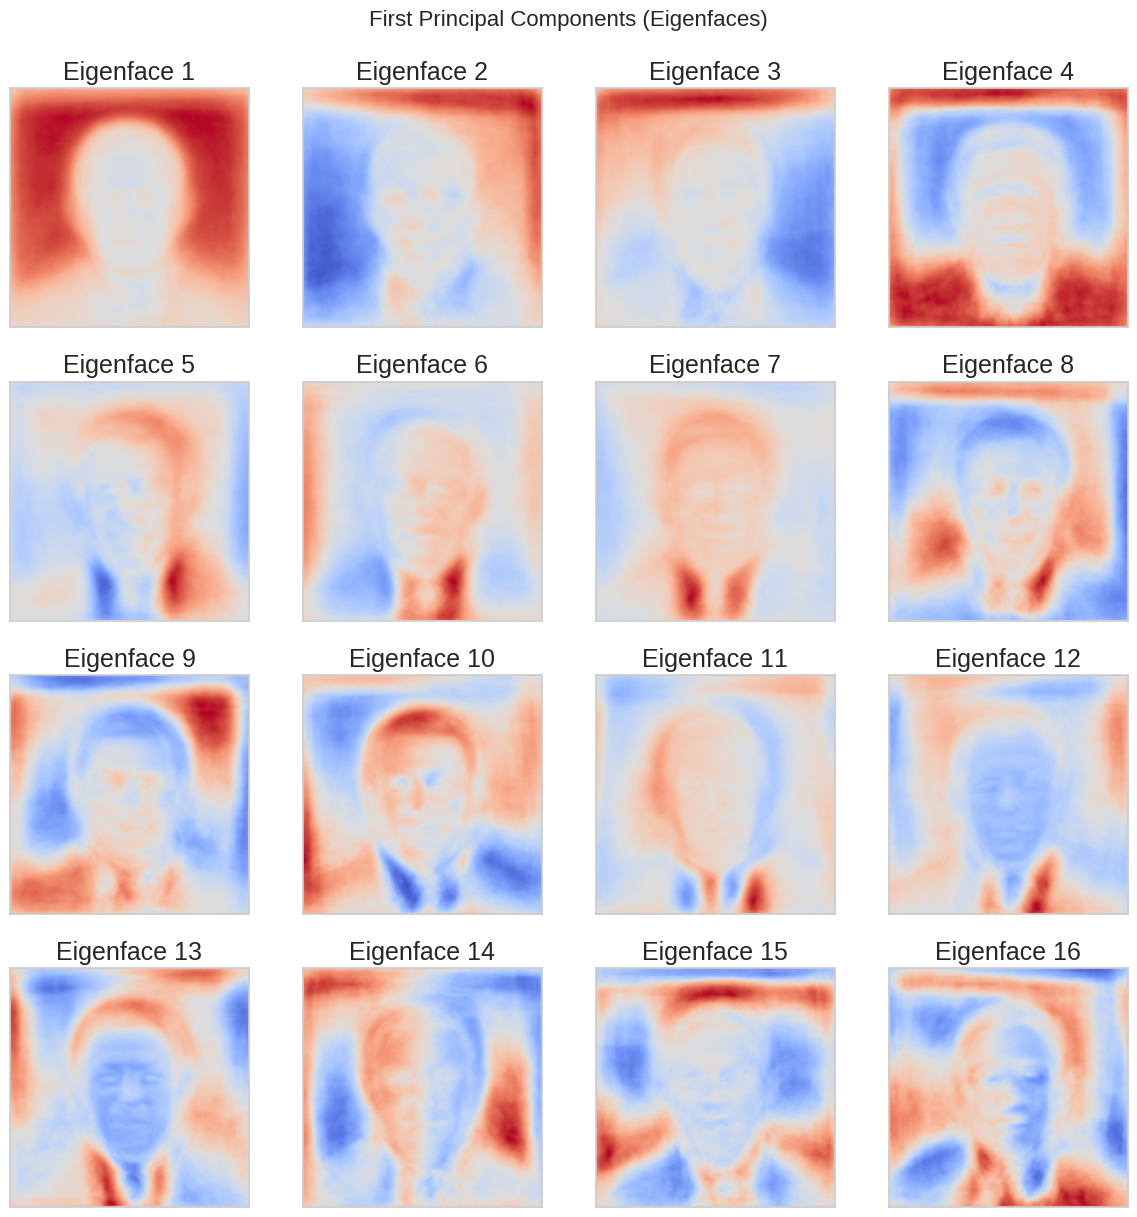

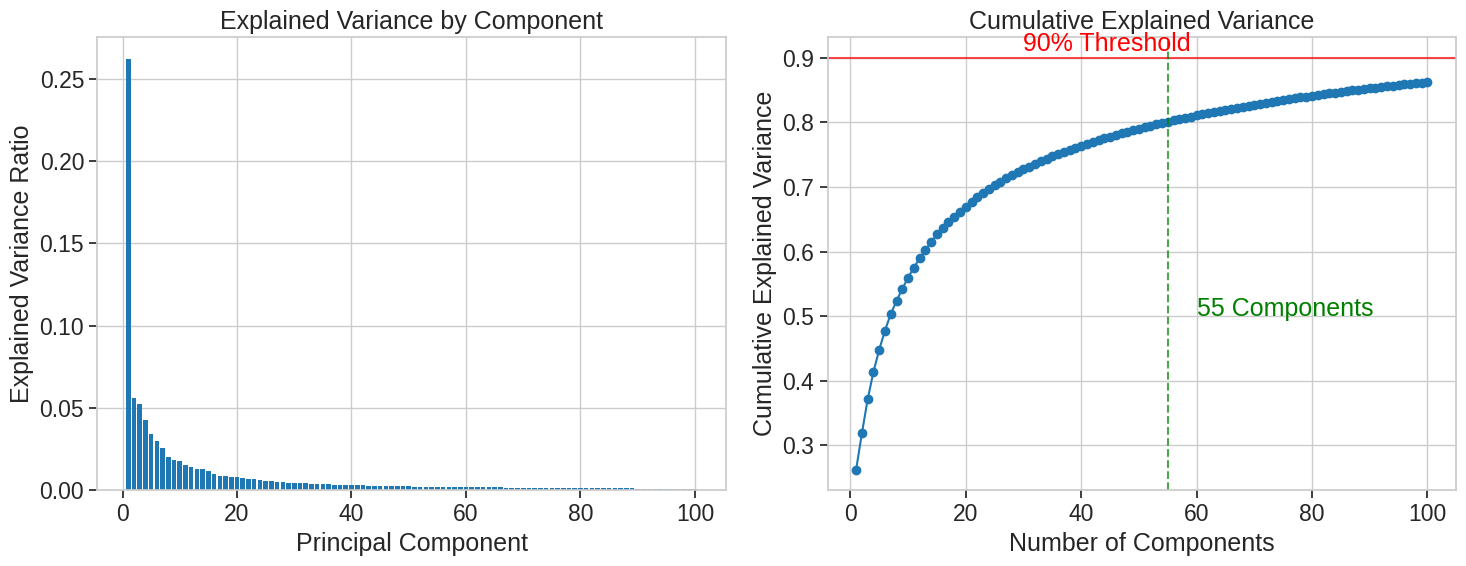

Number of components needed for 80% variance: 55
Number of components needed for 85% variance: 88


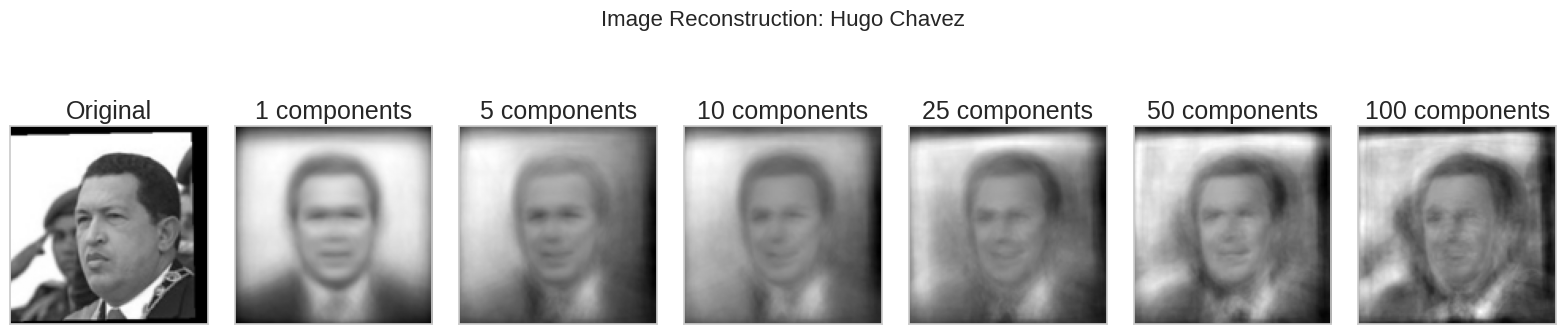

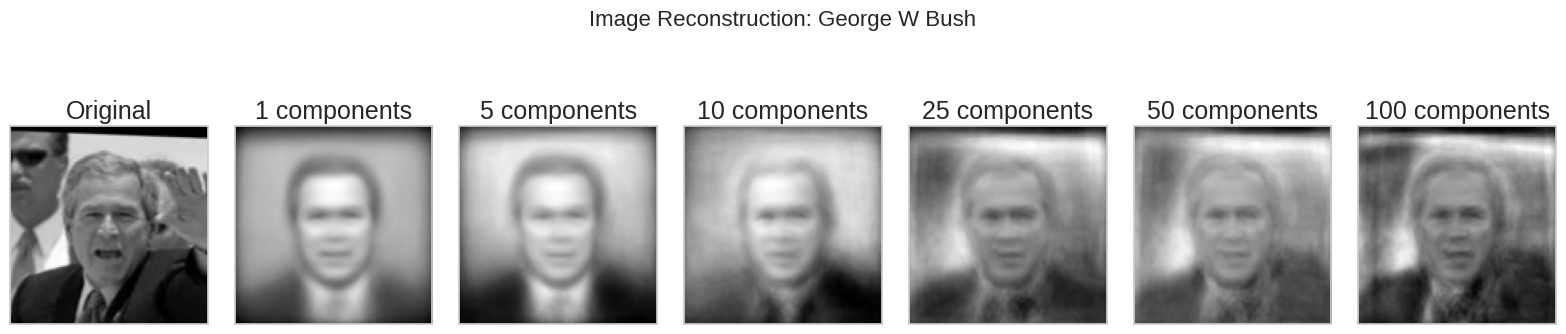

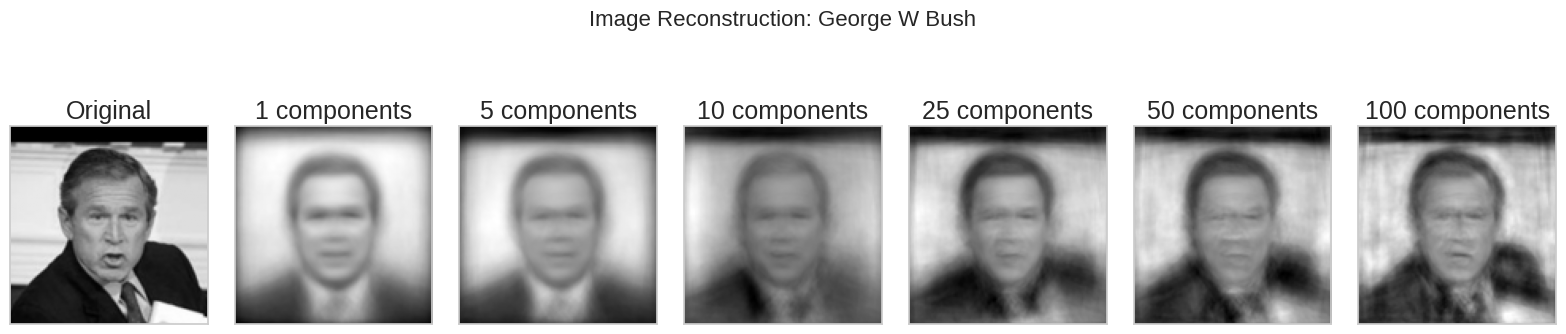

In [3]:
# Image PCA Analysis
# Principal Component Analysis on Image Dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from typing import Tuple, List

# Set the style for our plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.5)

# Step 1: Import a dataset
# We'll use the Labeled Faces in the Wild (LFW) dataset
# This is a dataset of face photographs designed for studying face recognition

def load_dataset(min_faces_per_person: int = 70) -> Tuple[np.ndarray, np.ndarray, List[str], Tuple[int, int]]:
    """
    Load the LFW face dataset.

    Args:
        min_faces_per_person: Minimum number of faces required per person

    Returns:
        X: Image data array (n_samples, n_features)
        y: Labels array (n_samples,)
        target_names: Names of people in the dataset
        shape: Original image dimensions (height, width)
    """
    print("Loading LFW dataset...")

    # Load only people with at least min_faces_per_person pictures
    lfw_people = fetch_lfw_people(min_faces_per_person=min_faces_per_person,
                                  resize=0.5,
                                  color=False,
                                  slice_=None)

    # Get the shape of each face image
    n_samples, h, w = lfw_people.images.shape
    shape = (h, w)

    # Reshape the data into a 2D array: each row is a flattened face image
    X = lfw_people.data
    y = lfw_people.target
    target_names = lfw_people.target_names

    print(f"Dataset loaded: {n_samples} images")
    print(f"Each image: {h}x{w} pixels")
    print(f"Number of different people: {len(target_names)}")

    # Display some sample images
    fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                             subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(lfw_people.images[i], cmap='gray')
        ax.set_title(target_names[y[i]])

    plt.tight_layout()
    plt.show()

    return X, y, target_names, shape

# Step 2: Center the data
def center_data(X: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Center the data by subtracting the mean.

    Args:
        X: Image data array (n_samples, n_features)

    Returns:
        X_centered: Centered data
        X_mean: Mean that was subtracted
    """
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    # Visualize the mean face
    plt.figure(figsize=(8, 8))
    plt.imshow(X_mean.reshape(shape), cmap='gray')
    plt.title('Mean Face')
    plt.axis('off')
    plt.colorbar()
    plt.show()

    return X_centered, X_mean

# Step 3: Compute Principal Components
def compute_pca(X_centered: np.ndarray, n_components: int = 100) -> Tuple[PCA, np.ndarray]:
    """
    Compute PCA on the centered data.

    Args:
        X_centered: Centered image data
        n_components: Number of components to keep

    Returns:
        pca: Fitted PCA object
        X_pca: Transformed data in component space
    """
    print(f"Computing {n_components} principal components...")

    # Initialize and fit PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_centered)

    print(f"PCA computed with {n_components} components")
    print(f"Explained variance ratio: {np.sum(pca.explained_variance_ratio_):.2f}")

    return pca, X_pca

# Step 4: Display Eigenimages
def display_eigenimages(pca: PCA, shape: Tuple[int, int], n_display: int = 16) -> None:
    """
    Display the first several "eigenimages".

    Args:
        pca: Fitted PCA object
        shape: Original image dimensions (height, width)
        n_display: Number of eigenimages to display
    """
    n_display = min(n_display, pca.components_.shape[0])

    n_cols = 4
    n_rows = (n_display + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12),
                            subplot_kw={'xticks': [], 'yticks': []})

    for i, (component, ax) in enumerate(zip(pca.components_[:n_display], axes.flat)):
        # Reshape component to image dimensions
        vmax = max(abs(component.min()), abs(component.max()))
        ax.imshow(component.reshape(shape), cmap='coolwarm',
                 vmin=-vmax, vmax=vmax)
        ax.set_title(f'Eigenface {i+1}')

    # If we have fewer components than axes, turn off remaining axes
    for j in range(i+1, len(axes.flat)):
        axes.flat[j].axis('off')

    plt.tight_layout()
    plt.suptitle('First Principal Components (Eigenfaces)', fontsize=16, y=1.02)
    plt.show()

# Step 5: Plot Variance Captured
def plot_variance(pca: PCA) -> None:
    """
    Plot explained variance as a function of number of components.

    Args:
        pca: Fitted PCA object
    """
    # Cumulative explained variance
    cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

    # Plot explained variance
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Individual variance plot
    ax1.bar(range(1, len(pca.explained_variance_ratio_) + 1),
            pca.explained_variance_ratio_)
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained Variance Ratio')
    ax1.set_title('Explained Variance by Component')

    # Cumulative variance plot
    ax2.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, 'o-')
    ax2.set_xlabel('Number of Components')
    ax2.set_ylabel('Cumulative Explained Variance')
    ax2.set_title('Cumulative Explained Variance')

    # Add a threshold line
    ax2.axhline(y=0.9, color='r', linestyle='-', alpha=0.7)
    ax2.text(30, 0.91, '90% Threshold', color='r')

    # Find where we hit 80% variance
    components_90 = np.where(cum_var_exp >= 0.8)[0][0] + 1
    ax2.axvline(x=components_90, color='g', linestyle='--', alpha=0.7)
    ax2.text(components_90 + 5, 0.5, f'{components_90} Components', color='g')

    plt.tight_layout()
    plt.show()

    print(f"Number of components needed for 80% variance: {components_90}")
    print(f"Number of components needed for 85% variance: {np.where(cum_var_exp >= 0.85)[0][0] + 1}")

# Step 6: Reconstruct images with different numbers of components
def reconstruct_faces(X_centered: np.ndarray, pca: PCA, X_mean: np.ndarray,
                    shape: Tuple[int, int], y: np.ndarray,
                    target_names: List[str], sample_idx: int = 0) -> None:
    """
    Reconstruct a face image using different numbers of principal components.

    Args:
        X_centered: Centered image data
        pca: Fitted PCA object
        X_mean: Mean that was subtracted
        shape: Original image dimensions (height, width)
        y: Labels array
        target_names: Names of people in the dataset
        sample_idx: Index of sample to reconstruct
    """
    # Get a sample image
    face = X_centered[sample_idx]

    # Project the face onto the principal component space
    face_pca = pca.transform([face])[0]

    # Components to use for reconstruction
    n_components = [1, 5, 10, 25, 50, 100]

    # Create a figure
    fig, axes = plt.subplots(1, len(n_components) + 1, figsize=(16, 4),
                           subplot_kw={'xticks': [], 'yticks': []})

    # Original image
    axes[0].imshow((face + X_mean).reshape(shape), cmap='gray')
    axes[0].set_title('Original')

    # Reconstructed images
    for i, n in enumerate(n_components):
        # Reconstruct using first n components
        reconst = np.dot(face_pca[:n], pca.components_[:n]) + X_mean

        axes[i+1].imshow(reconst.reshape(shape), cmap='gray')
        axes[i+1].set_title(f'{n} components')

    plt.suptitle(f'Image Reconstruction: {target_names[y[sample_idx]]}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Step 1: Load dataset
    X, y, target_names, shape = load_dataset(min_faces_per_person=70)

    # Step 2: Center the data
    X_centered, X_mean = center_data(X)

    # Step 3: Compute Principal Components
    pca, X_pca = compute_pca(X_centered, n_components=100)

    # Step 4: Display Eigenimages (Eigenfaces)
    display_eigenimages(pca, shape, n_display=16)

    # Step 5: Plot Variance Captured
    plot_variance(pca)

    # Step 6: Reconstruct faces with different numbers of components
    # Let's view a few different faces
    for idx in [0, 10, 20]:
        reconstruct_faces(X_centered, pca, X_mean, shape, y, target_names, sample_idx=idx)

Here's another example with a different dataset of pokemon. This one didn't work so well, as it's super diverse with over 800 different types of pokemon, so it can't really find a "mean pokemon", per se. The eigen-pokemon are also similarly weird, but the PCA reconstructions is super interesting to see how they come together.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading Pokemon images from /content/drive/MyDrive/images...
Found 898 Pokemon categories


100%|██████████| 898/898 [19:50<00:00,  1.33s/it]


Dataset loaded: 200 images
Each image: 128x128 pixels, 3 channels
Data shape: (200, 49152)


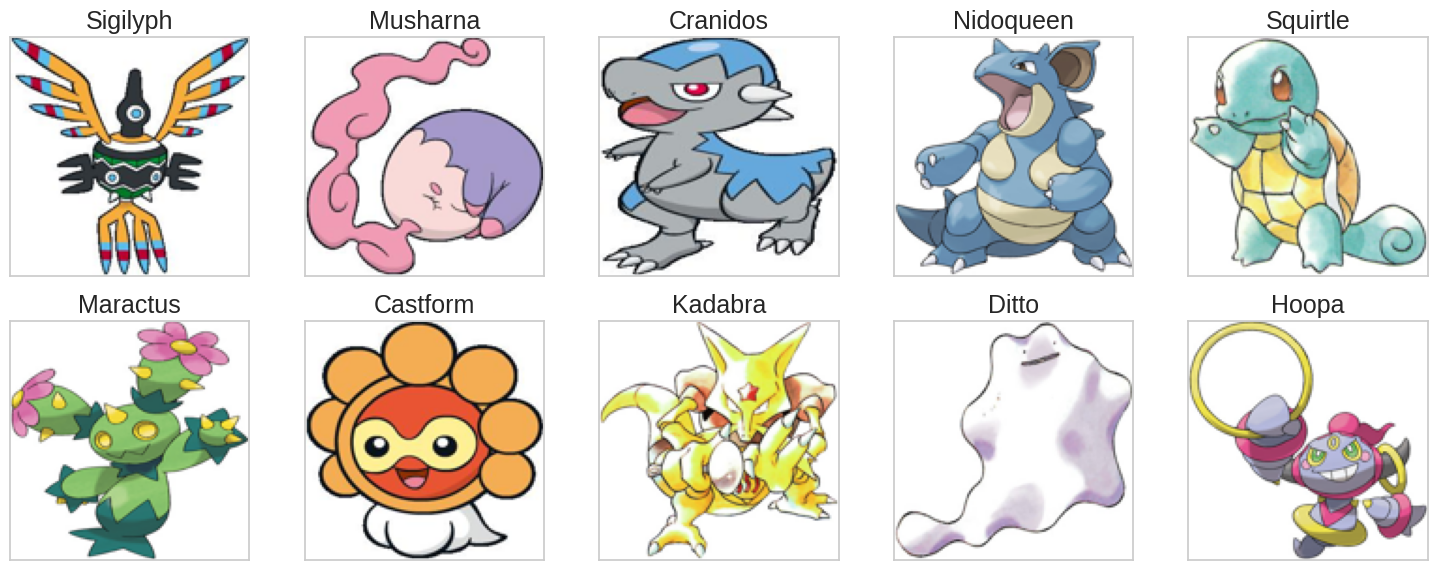

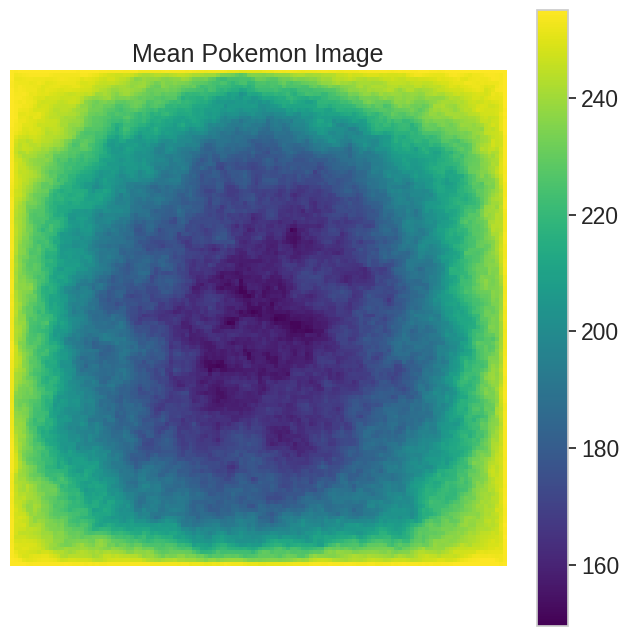

Computing principal components...
PCA computed with 100 components
Explained variance ratio sum: 0.8585


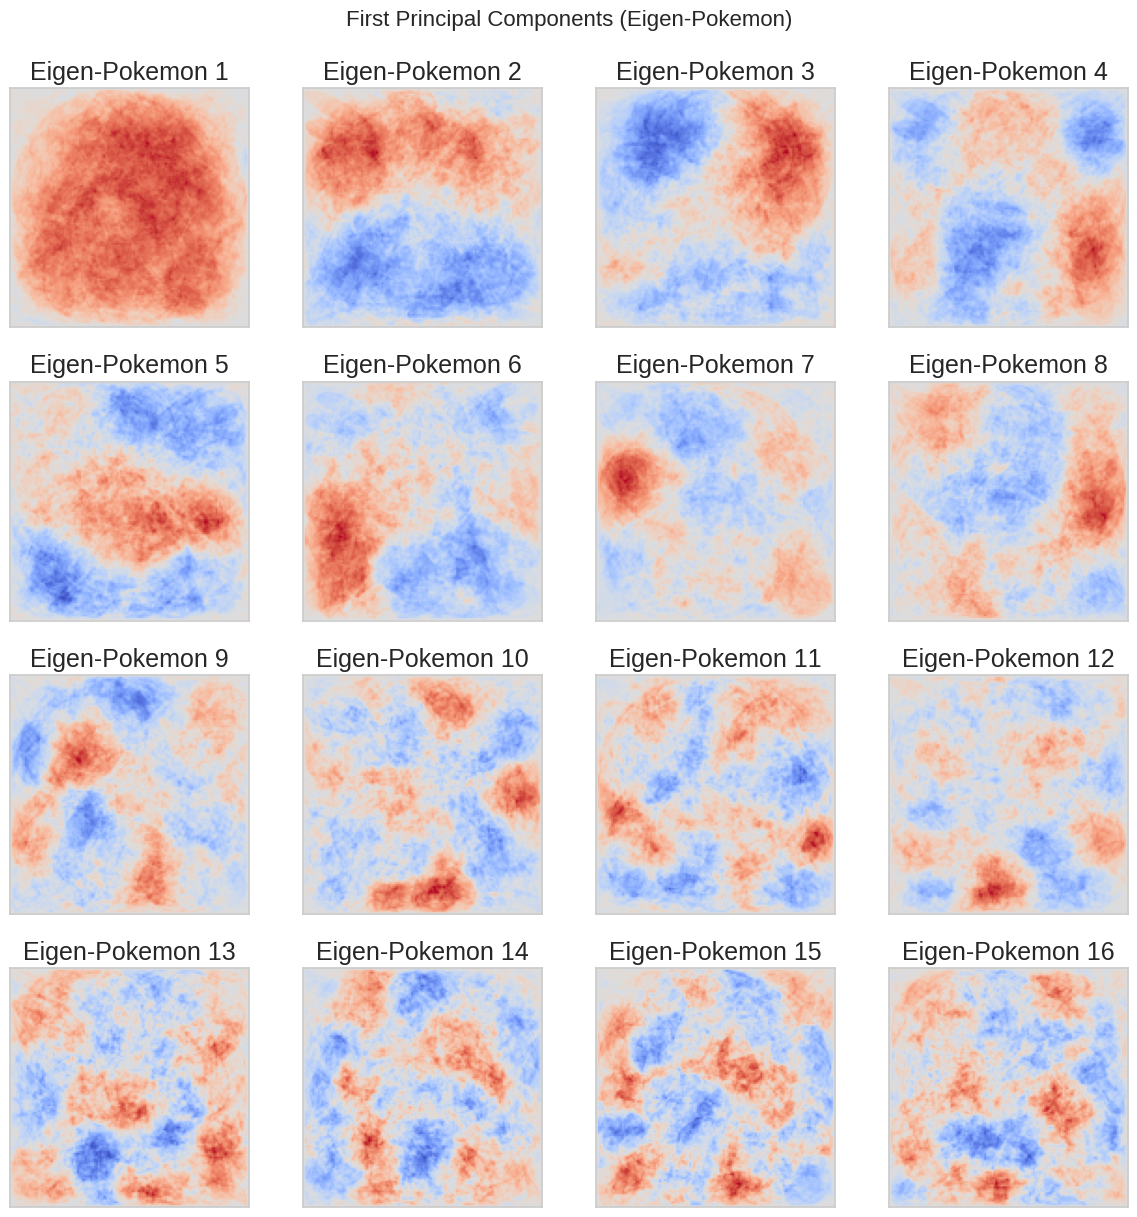

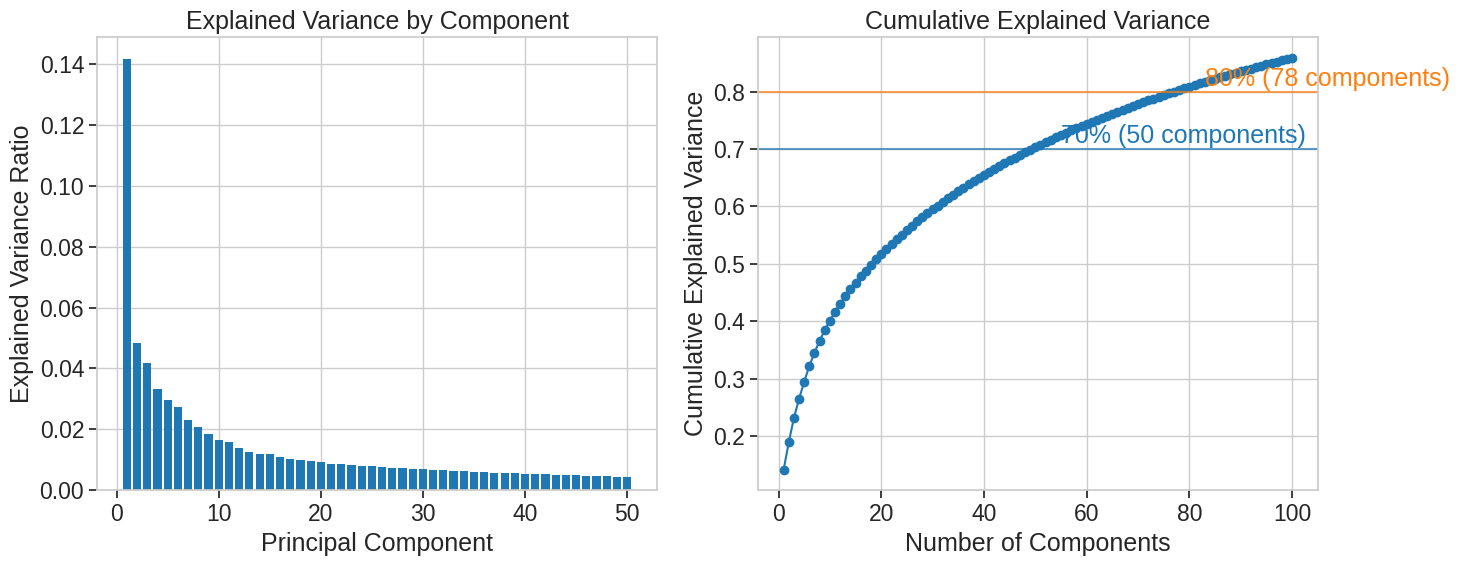

Components needed for 70% variance: 50
Components needed for 80% variance: 78
Cannot capture 90% variance with available components
Cannot capture 95% variance with available components
Cannot capture 99% variance with available components


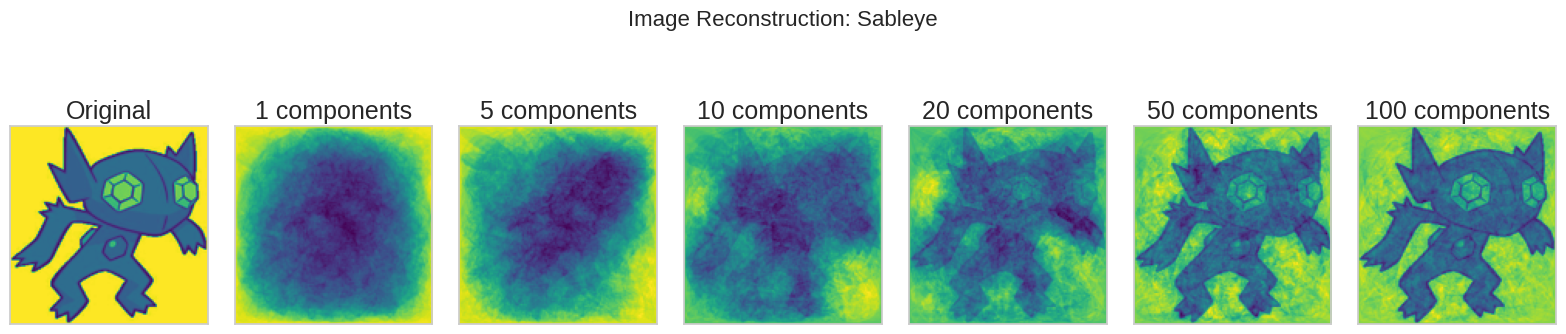

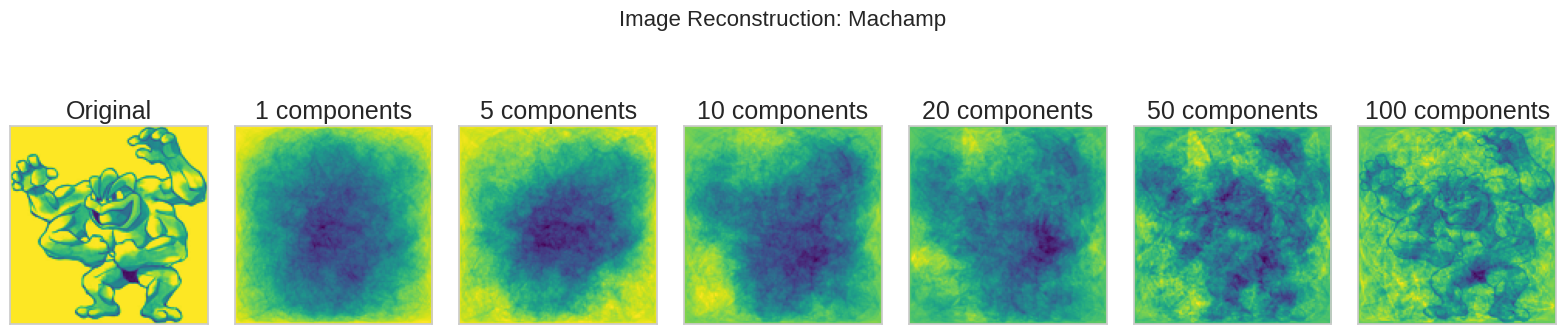

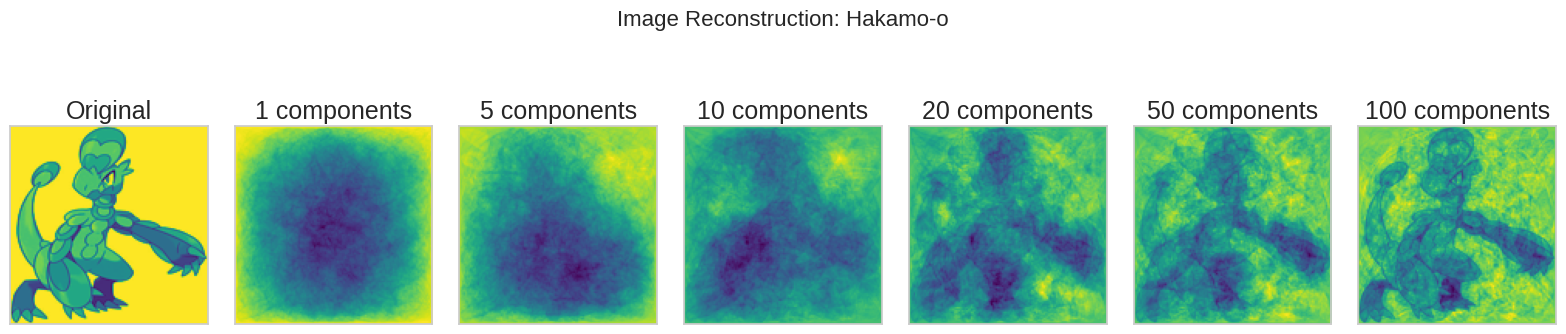

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 776 (\N{COMBINING DIAERESIS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 807 (\N{COMBINING CEDILLA}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


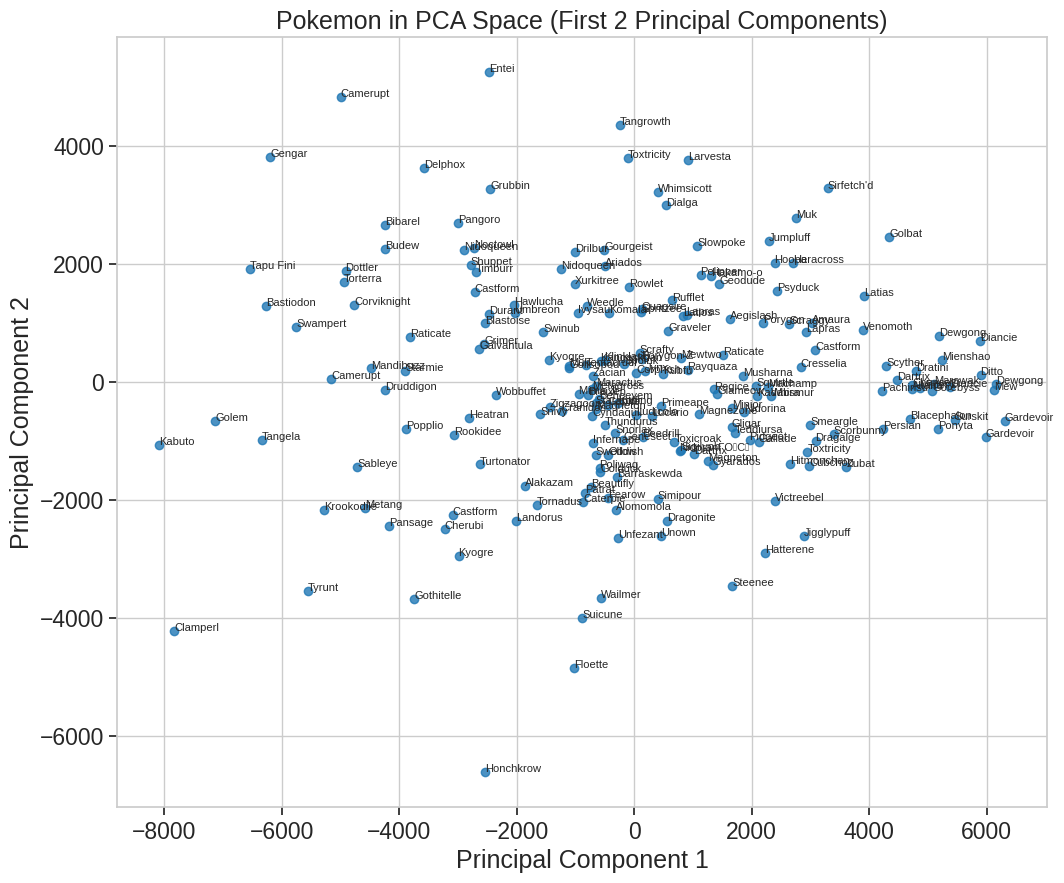

In [5]:
# Pokemon Image PCA Analysis
# Principal Component Analysis on Pokemon Dataset

import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.decomposition import PCA
import seaborn as sns
from google.colab import drive
from typing import Tuple, List, Dict
from tqdm import tqdm
import random

# Set the style for our plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.5)

# Mount Google Drive
drive.mount('/content/drive')

# Step 1: Load images from the Pokemon dataset
def load_pokemon_dataset(base_path: str = '/content/drive/MyDrive/images',
                         img_size: Tuple[int, int] = (128, 128),
                         max_images_per_class: int = 20,
                         sample_size: int = 200) -> Tuple[np.ndarray, List[str], List[str]]:
    """
    Load Pokemon images from a directory structure where each subfolder is a Pokemon species.

    Args:
        base_path: Path to the main folder containing Pokemon subfolders
        img_size: Size to resize images to (width, height)
        max_images_per_class: Maximum images to load per Pokemon species
        sample_size: Maximum total number of images to use (will sample randomly if needed)

    Returns:
        X: Image data array (n_samples, width*height*channels)
        filenames: List of image filenames
        pokemon_names: List of Pokemon names corresponding to each image
    """
    print(f"Loading Pokemon images from {base_path}...")

    # Lists to store data
    images = []
    filenames = []
    pokemon_names = []

    # Get list of Pokemon directories
    pokemon_dirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
    print(f"Found {len(pokemon_dirs)} Pokemon categories")

    # For each Pokemon directory, load images
    for pokemon_dir in tqdm(pokemon_dirs):
        pokemon_path = os.path.join(base_path, pokemon_dir)
        image_files = [f for f in os.listdir(pokemon_path)
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Limit images per class
        if len(image_files) > max_images_per_class:
            image_files = random.sample(image_files, max_images_per_class)

        for img_file in image_files:
            img_path = os.path.join(pokemon_path, img_file)
            try:
                # Load and convert to RGB (in case of RGBA or grayscale)
                img = Image.open(img_path).convert('RGB')
                # Resize
                img = img.resize(img_size)
                # Convert to numpy array and flatten
                img_array = np.array(img)
                # Store
                images.append(img_array)
                filenames.append(img_path)
                pokemon_names.append(pokemon_dir)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    # Convert list of images to a single numpy array
    X = np.array(images)

    # If we have more than sample_size images, randomly sample
    if len(X) > sample_size:
        indices = random.sample(range(len(X)), sample_size)
        X = X[indices]
        filenames = [filenames[i] for i in indices]
        pokemon_names = [pokemon_names[i] for i in indices]

    # Reshape data to 2D array (n_samples, n_features)
    n_samples, height, width, channels = X.shape
    X_2d = X.reshape(n_samples, -1)

    print(f"Dataset loaded: {n_samples} images")
    print(f"Each image: {width}x{height} pixels, {channels} channels")
    print(f"Data shape: {X_2d.shape}")

    # Display some sample images
    n_display = min(10, n_samples)
    fig, axes = plt.subplots(2, 5, figsize=(15, 6),
                             subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat[:n_display]):
        ax.imshow(X[i])
        ax.set_title(pokemon_names[i])

    # If we have fewer images than display slots, turn off remaining axes
    for j in range(n_display, len(axes.flat)):
        axes.flat[j].axis('off')

    plt.tight_layout()
    plt.show()

    return X_2d, filenames, pokemon_names, (height, width, channels)

# Step 2: Convert to grayscale and center the data
def preprocess_data(X: np.ndarray, shape: Tuple[int, int, int]) -> Tuple[np.ndarray, np.ndarray, Tuple[int, int]]:
    """
    Preprocess the data by converting to grayscale and centering.

    Args:
        X: Image data array (n_samples, width*height*channels)
        shape: Original image shape (height, width, channels)

    Returns:
        X_centered: Centered grayscale data
        X_mean: Mean that was subtracted
        gray_shape: Grayscale image shape (height, width)
    """
    height, width, channels = shape
    n_samples = X.shape[0]

    # Reshape back to images
    X_images = X.reshape(n_samples, height, width, channels)

    # Convert to grayscale
    X_gray = np.zeros((n_samples, height, width))
    for i, img in enumerate(X_images):
        # Simple grayscale conversion: average the channels
        X_gray[i] = np.mean(img, axis=2)

    # Flatten the grayscale images
    X_gray_flat = X_gray.reshape(n_samples, -1)

    # Center the data
    X_mean = np.mean(X_gray_flat, axis=0)
    X_centered = X_gray_flat - X_mean

    # Visualize the mean Pokemon
    plt.figure(figsize=(8, 8))
    plt.imshow(X_mean.reshape(height, width), cmap='viridis')
    plt.title('Mean Pokemon Image')
    plt.axis('off')
    plt.colorbar()
    plt.show()

    return X_centered, X_mean, (height, width)

# Step 3: Compute Principal Components
def compute_pca(X_centered: np.ndarray, n_components: int = 100) -> Tuple[PCA, np.ndarray]:
    """
    Compute PCA on the centered data.

    Args:
        X_centered: Centered image data
        n_components: Number of components to keep (or float for variance threshold)

    Returns:
        pca: Fitted PCA object
        X_pca: Transformed data in component space
    """
    print(f"Computing principal components...")

    # Initialize and fit PCA
    pca = PCA(n_components=min(n_components, X_centered.shape[0], X_centered.shape[1]))
    X_pca = pca.fit_transform(X_centered)

    print(f"PCA computed with {pca.n_components_} components")
    print(f"Explained variance ratio sum: {np.sum(pca.explained_variance_ratio_):.4f}")

    return pca, X_pca

# Step 4: Display Eigenimages
def display_eigenimages(pca: PCA, shape: Tuple[int, int], n_display: int = 16) -> None:
    """
    Display the first several "eigen-pokemon" images.

    Args:
        pca: Fitted PCA object
        shape: Grayscale image dimensions (height, width)
        n_display: Number of eigenimages to display
    """
    n_display = min(n_display, pca.components_.shape[0])
    height, width = shape

    n_cols = 4
    n_rows = (n_display + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12),
                            subplot_kw={'xticks': [], 'yticks': []})

    for i, (component, ax) in enumerate(zip(pca.components_[:n_display], axes.flat)):
        # Reshape component to image dimensions
        vmax = max(abs(component.min()), abs(component.max()))
        ax.imshow(component.reshape(height, width), cmap='coolwarm',
                 vmin=-vmax, vmax=vmax)
        ax.set_title(f'Eigen-Pokemon {i+1}')

    # If we have fewer components than axes, turn off remaining axes
    for j in range(i+1, len(axes.flat)):
        axes.flat[j].axis('off')

    plt.tight_layout()
    plt.suptitle('First Principal Components (Eigen-Pokemon)', fontsize=16, y=1.02)
    plt.show()

# Step 5: Plot Variance Captured
def plot_variance(pca: PCA) -> None:
    """
    Plot explained variance as a function of number of components.

    Args:
        pca: Fitted PCA object
    """
    # Cumulative explained variance
    cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

    # Plot explained variance
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Individual variance plot (showing top 50 components or all if less than 50)
    n_components_to_show = min(50, len(pca.explained_variance_ratio_))

    ax1.bar(range(1, n_components_to_show + 1),
            pca.explained_variance_ratio_[:n_components_to_show])
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained Variance Ratio')
    ax1.set_title('Explained Variance by Component')

    # Cumulative variance plot
    ax2.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, 'o-')
    ax2.set_xlabel('Number of Components')
    ax2.set_ylabel('Cumulative Explained Variance')
    ax2.set_title('Cumulative Explained Variance')

    # Add threshold lines
    for threshold in [0.7, 0.8, 0.9, 0.95]:
        if max(cum_var_exp) >= threshold:
            ax2.axhline(y=threshold, color=f'C{int(threshold*10-7)}', linestyle='-', alpha=0.7)
            components_threshold = np.where(cum_var_exp >= threshold)[0][0] + 1
            ax2.text(components_threshold + len(cum_var_exp) * 0.05,
                    threshold + 0.01,
                    f'{int(threshold*100)}% ({components_threshold} components)',
                    color=f'C{int(threshold*10-7)}')

    plt.tight_layout()
    plt.show()

    # Print number of components needed for various thresholds
    for threshold in [0.7, 0.8, 0.9, 0.95, 0.99]:
        if max(cum_var_exp) >= threshold:
            components_threshold = np.where(cum_var_exp >= threshold)[0][0] + 1
            print(f"Components needed for {threshold*100:.0f}% variance: {components_threshold}")
        else:
            print(f"Cannot capture {threshold*100:.0f}% variance with available components")

# Step 6: Reconstruct images with different numbers of components
def reconstruct_pokemon(X_centered: np.ndarray, pca: PCA, X_mean: np.ndarray,
                      shape: Tuple[int, int], pokemon_names: List[str],
                      sample_indices: List[int] = None) -> None:
    """
    Reconstruct Pokemon images using different numbers of principal components.

    Args:
        X_centered: Centered image data
        pca: Fitted PCA object
        X_mean: Mean that was subtracted
        shape: Grayscale image dimensions (height, width)
        pokemon_names: Names of Pokemon corresponding to each image
        sample_indices: Indices of samples to reconstruct (or None for random selection)
    """
    n_samples = 3  # Number of different Pokemon to show

    # Select samples randomly if not provided
    if sample_indices is None:
        sample_indices = random.sample(range(X_centered.shape[0]), n_samples)

    # Components to use for reconstruction
    n_components = [1, 5, 10, 20, 50, 100]
    n_components = [n for n in n_components if n <= pca.n_components_]

    for idx in sample_indices:
        # Get a sample image
        pokemon = X_centered[idx]

        # Project the Pokemon onto the principal component space
        pokemon_pca = pca.transform([pokemon])[0]

        # Create a figure
        fig, axes = plt.subplots(1, len(n_components) + 1, figsize=(16, 4),
                               subplot_kw={'xticks': [], 'yticks': []})

        # Original image
        axes[0].imshow((pokemon + X_mean).reshape(shape), cmap='viridis')
        axes[0].set_title('Original')

        # Reconstructed images
        for i, n in enumerate(n_components):
            # Reconstruct using first n components
            reconst = np.dot(pokemon_pca[:n], pca.components_[:n]) + X_mean

            axes[i+1].imshow(reconst.reshape(shape), cmap='viridis')
            axes[i+1].set_title(f'{n} components')

        plt.suptitle(f'Image Reconstruction: {pokemon_names[idx]}', fontsize=16)
        plt.tight_layout()
        plt.show()

# Main execution
if __name__ == "__main__":
    # Step 1: Load Pokemon dataset from Google Drive
    # Adjust the path to match your Google Drive structure
    X, filenames, pokemon_names, original_shape = load_pokemon_dataset(
        base_path='/content/drive/MyDrive/images',
        img_size=(128, 128),
        max_images_per_class=10,
        sample_size=200
    )

    # Step 2: Preprocess data (convert to grayscale and center)
    X_centered, X_mean, gray_shape = preprocess_data(X, original_shape)

    # Step 3: Compute Principal Components
    pca, X_pca = compute_pca(X_centered, n_components=100)

    # Step 4: Display Eigenimages (Eigen-Pokemon)
    display_eigenimages(pca, gray_shape, n_display=16)

    # Step 5: Plot Variance Captured
    plot_variance(pca)

    # Step 6: Reconstruct Pokemon with different numbers of components
    # Pick a few random Pokemon to reconstruct
    sample_indices = random.sample(range(len(pokemon_names)), 3)
    reconstruct_pokemon(X_centered, pca, X_mean, gray_shape, pokemon_names, sample_indices)

    # Step 7: Visualize Pokemon in PCA space (first 2 dimensions)
    plt.figure(figsize=(12, 10))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)

    # Add Pokemon names as labels
    for i, (x, y, name) in enumerate(zip(X_pca[:, 0], X_pca[:, 1], pokemon_names)):
        plt.annotate(name, (x, y), fontsize=8)

    plt.title('Pokemon in PCA Space (First 2 Principal Components)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()